# Bank Marketing Dataset Anaysis

#### Author: Geovanny Tabango


# CRIPS - DM Methodology
 1. Bussiness Understanding.
 2. Data Understanding. 
 3. Data Preparation.
 4. Modelling. 
 5. Evaluation. 
 6. Deplotment.

### 1. Bussiness Understanding
 - Marketing campaing from 2008 to 2010 (2 Years Data Colleted).
 - The target value `y` describes wether the customer holds subscribe deposit in the bank or not.
 - Its expected to have the samples a larger distribution of `no` subscription compared to the `yes`.
 - The marketing team is to use the information extracted from the data set to better orginze a strategy to possitevely indentify costumers that are more likely to say `yes` to subscribe to the deposit.
 - The end objective is to better utilize the resources of the banking allowing a more room of improvements in the calls.

### 2. Data Understanding

##### 2.1 Imports needed for data analyis

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from scipy.stats import chi2_contingency
from sklearn.impute import SimpleImputer

#### 2.2 Load the dataset

In [21]:
# Set a ramdom seed for reproducibility
# The random seed method hold and arbitrary number
np.random.seed(92)

In [22]:
# Load the dataset in to a pandas dataframe.
# By exploring the dataset we can see that the data is a CSV file with a delimiter of semi-colon ';'.
df = pd.read_csv('../data/raw/bank-additional-full.csv', sep=';')

#### 2.3 Display the basic information of the dataset.

- By the description of the dataset there are 0 missing values. 

In [4]:
#Double checking for missing values
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [6]:
#Display the 5 firt rows of the dataset
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [7]:
#Display the 5 last rows of the dataset
df.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [8]:
# Display the columns of the dataset
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [30]:
# Display the shape of the dataset
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,41188.0,NaN,NaN,NaN,40.02406,10.42125,17.0,32.0,38.0,47.0,98.0
job,41188,12,admin.,10422,NaN,NaN,NaN,NaN,NaN,NaN,NaN
marital,41188,4,married,24928,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,41188,8,university.degree,12168,NaN,NaN,NaN,NaN,NaN,NaN,NaN
default,41188,3,no,32588,NaN,NaN,NaN,NaN,NaN,NaN,NaN
housing,41188,3,yes,21576,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan,41188,3,no,33950,NaN,NaN,NaN,NaN,NaN,NaN,NaN
contact,41188,2,cellular,26144,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month,41188,10,may,13769,NaN,NaN,NaN,NaN,NaN,NaN,NaN
day_of_week,41188,5,thu,8623,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# The skew method is to determine the skewness of the dataset.
# This method is only applied to the numerical type of data.
# 0 means the data is normally distributed.
# values close to 1 means the data is skewed to the right.
# values close to -1 means the data is skewed to the left.
df.skew(numeric_only=True)

age               0.784697
duration          3.263141
campaign          4.762507
pdays            -4.922190
previous          3.832042
emp.var.rate     -0.724096
cons.price.idx   -0.230888
cons.conf.idx     0.303180
euribor3m        -0.709188
nr.employed      -1.044262
dtype: float64

In [12]:
# Display the unique values of the dataset.
# Selet all the 'object' type of columns and apply the values_counts method which will display the unique values of the columns.

categorical_columns = df.select_dtypes(include=['object']).columns

for column in categorical_columns:
    print(f"Value counts for column '{column}':")
    print(df[column].value_counts())
    print("\n")

Value counts for column 'job':
job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64


Value counts for column 'marital':
marital
married     24928
single      11568
divorced     4612
unknown        80
Name: count, dtype: int64


Value counts for column 'education':
education
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: count, dtype: int64


Value counts for column 'default':
default
no         32588
unknown     8597
yes            3
Name: count, dtype: int64


Value counts for column 'housing':
housing
yes        21576
no         18622
unknown     

In [13]:
# Display the unique values in the dataset.

for column in df.columns:
    print(f"Unique values in column '{column}':")
    print(df[column].unique())
    print("\n")

Unique values in column 'age':
[56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 30 55 49 34 52 58 32 38 44
 42 60 53 47 51 48 33 31 43 36 28 27 26 22 23 20 21 61 19 18 70 66 76 67
 73 88 95 77 68 75 63 80 62 65 72 82 64 71 69 78 85 79 83 81 74 17 87 91
 86 98 94 84 92 89]


Unique values in column 'job':
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']


Unique values in column 'marital':
['married' 'single' 'divorced' 'unknown']


Unique values in column 'education':
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']


Unique values in column 'default':
['no' 'unknown' 'yes']


Unique values in column 'housing':
['no' 'yes' 'unknown']


Unique values in column 'loan':
['no' 'yes' 'unknown']


Unique values in column 'contact':
['telephone' 'cellular']


Unique values in column 'month':
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'de

### 2.5 Exploratory Data Analysis (EDA)

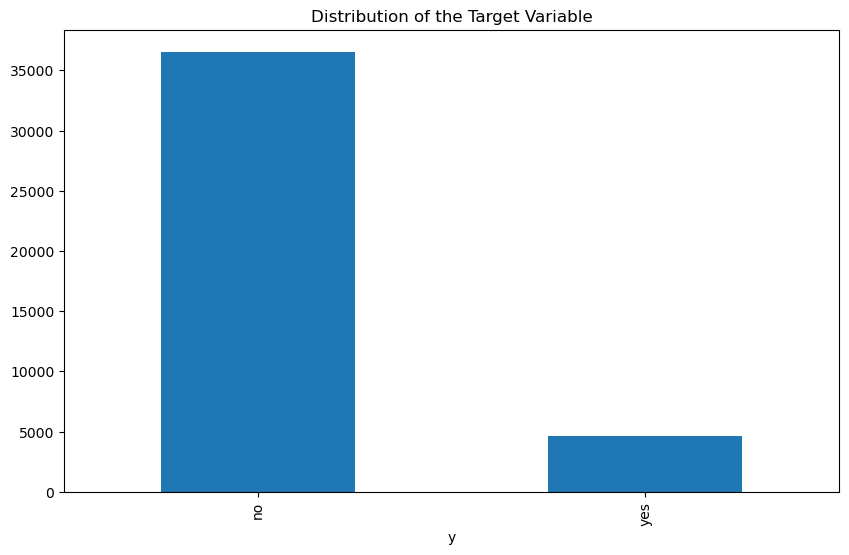

In [21]:
plt.figure(figsize=(10, 6))
df['y'].value_counts().plot(kind='bar')
plt.title('Distribution of the Target Variable')
plt.savefig('../reports/figures/Task_1/target_variable_distribution.png')
plt.show() 
plt.close()


- The bargrah shows an unbalance dataset since more customer are more likely to say not to the marketing calls.
- Therefore, the use of other varibles such as `job` , `education`, `maritail`, etc are need to effectively identify the proportion of costumers that are more likely to say `yes` to marketing.

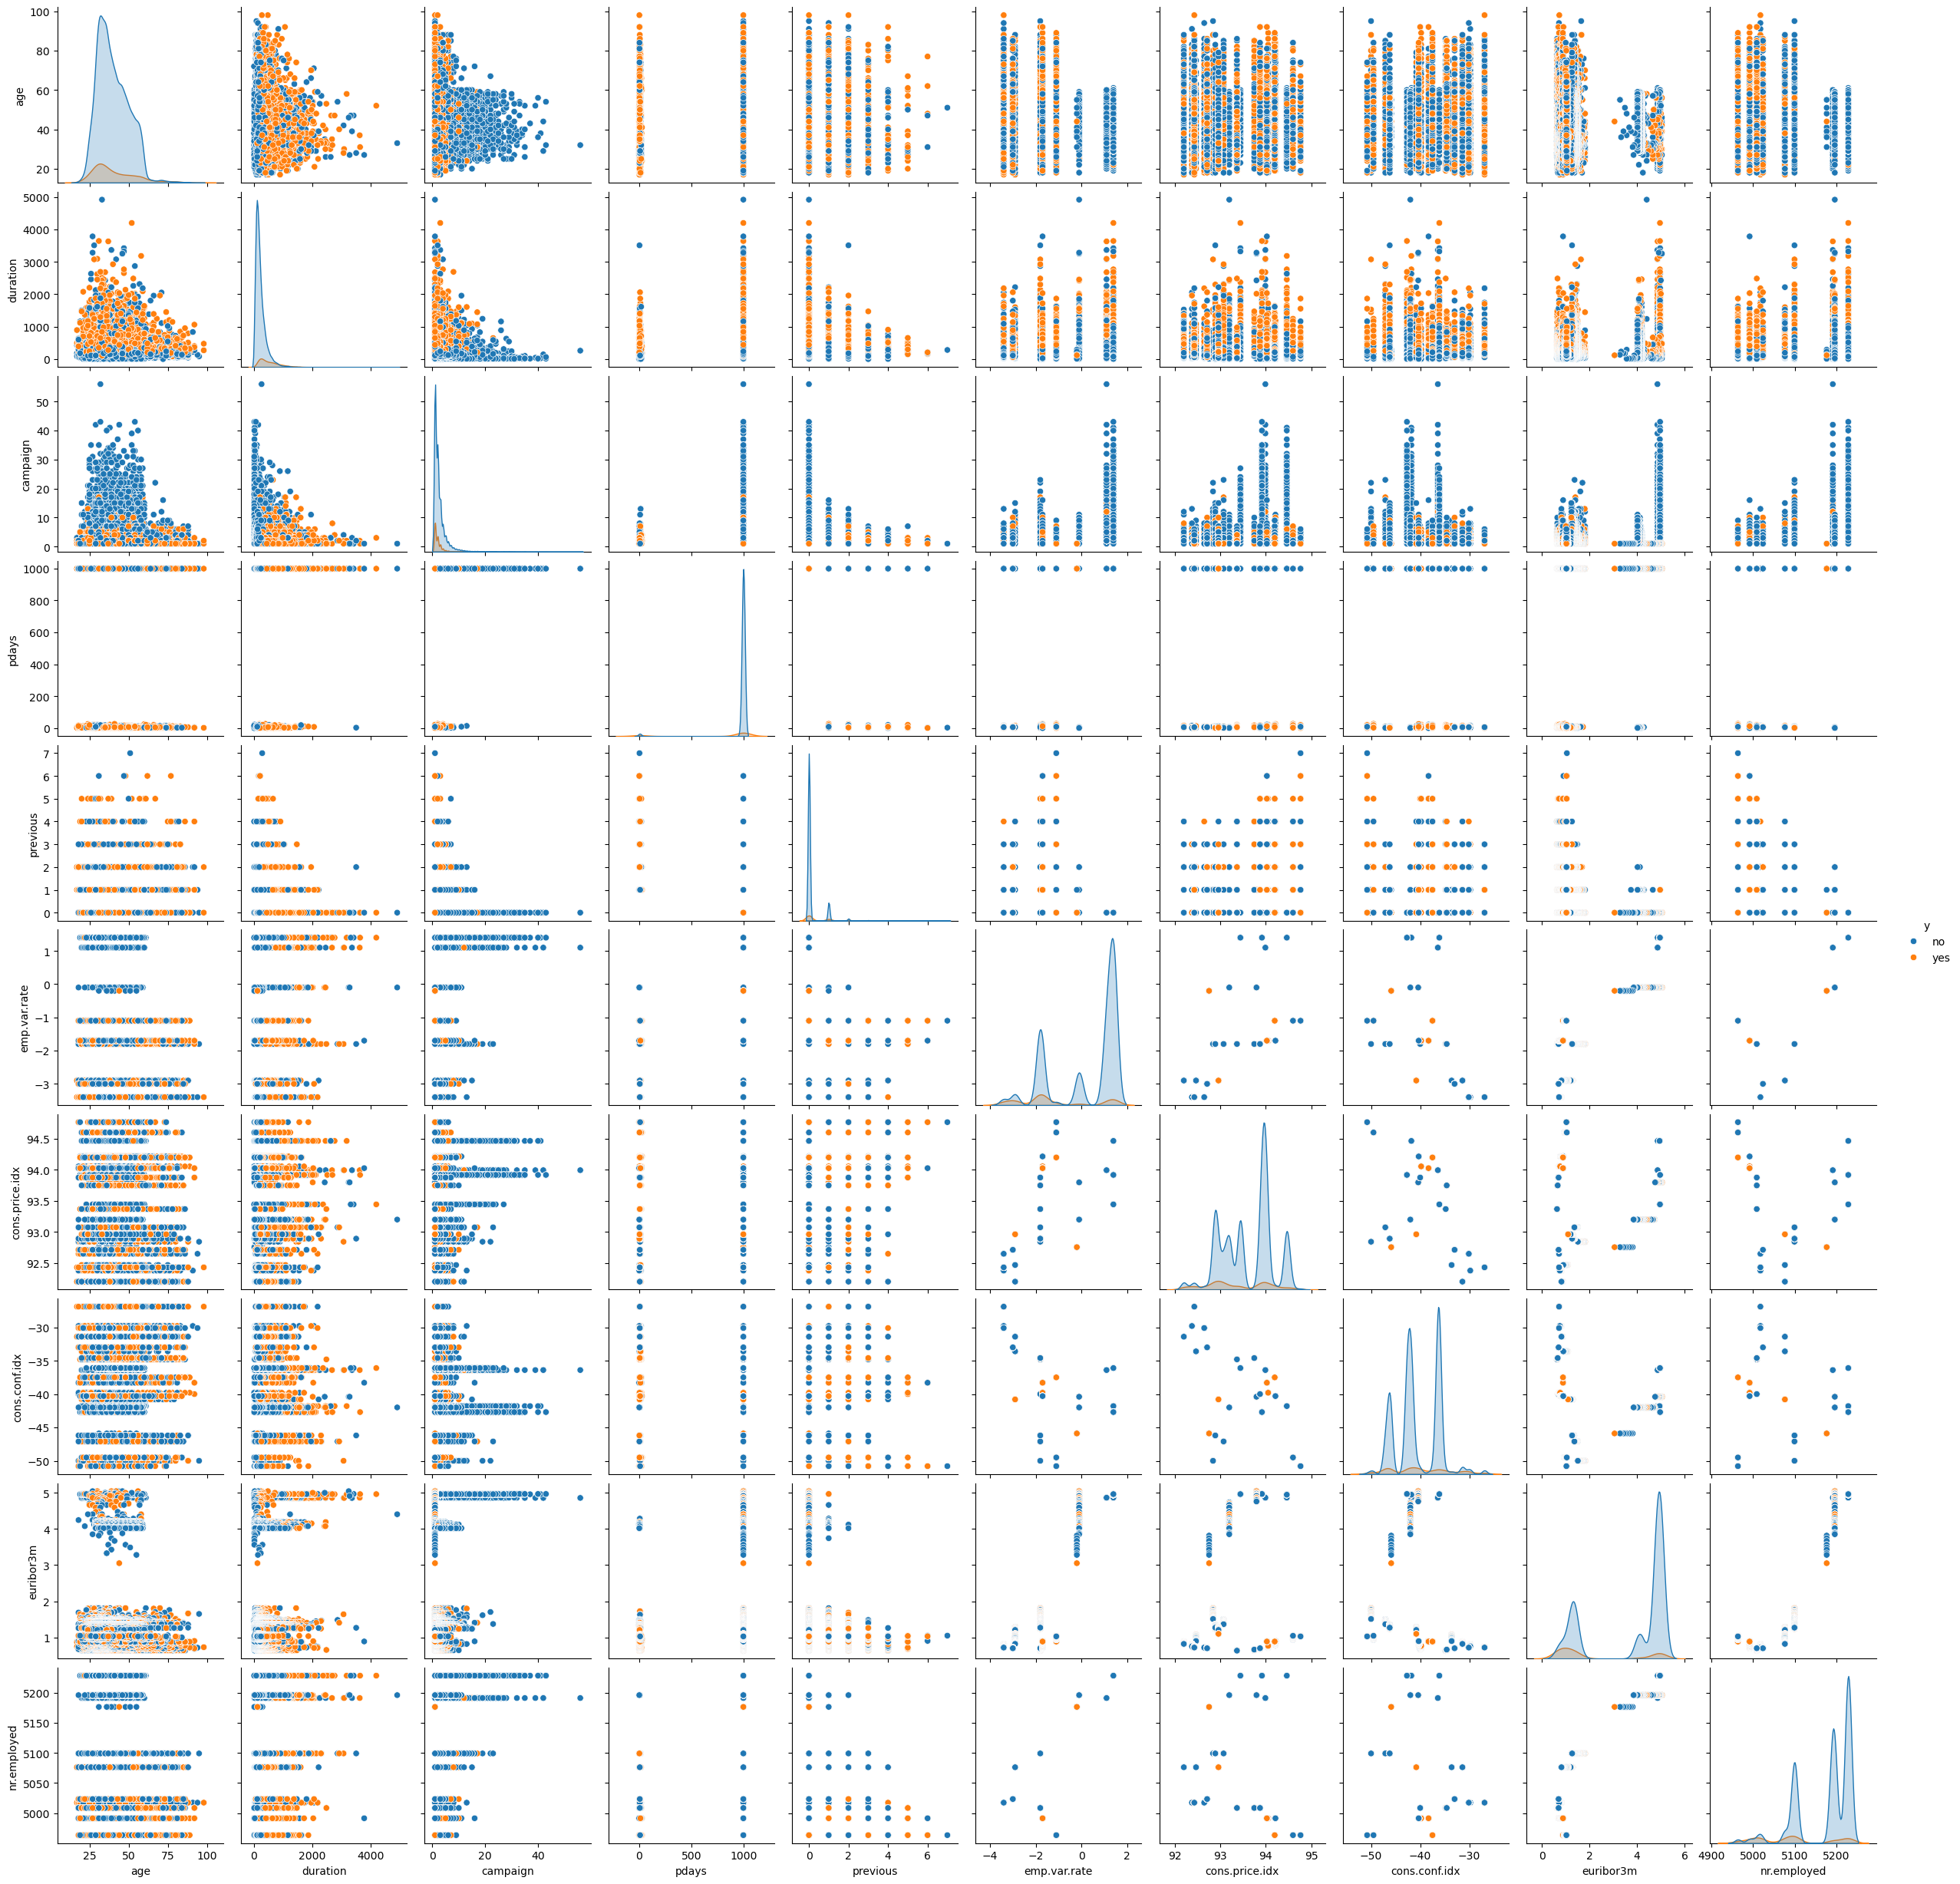

In [16]:
# Plot the dataset in a pairplot to see the relationship between the features.
# The pairplot method is used to plot pairwise relationships in a dataset using Seaborn.

sns.pairplot(df, hue='y')

### Pairplot Evaluation and Description

The pairplot provides a comprehensive view of the pairwise relationships between the features `age`, `duration`, and `campaign` in the dataset, with the target variable `y` used as the hue to color-code the data points.

#### Key Observations:

1. **Diagonal Subplots (Histograms)**:
   - **Age**: The distribution is slightly right-skewed, indicating that most values are concentrated on the lower end.
   - **Duration**: The distribution is right-skewed, with a long tail indicating some very high values.
   - **Campaign**: The distribution is heavily right-skewed, with most values concentrated at the lower end and a few high values.

2. **Off-Diagonal Subplots (Scatter Plots)**:
   - **Age vs. Duration**: There is no clear linear relationship, and the data points are more scattered. The categories of `y` show some overlap but are generally distinguishable.
   - **Age vs. Campaign**: There is no clear linear relationship, and the data points are more scattered. The categories of `y` show significant overlap.
   - **Duration vs. Campaign**: There is no clear linear relationship, and the data points are more scattered. The categories of `y` show some overlap but are generally distinguishable.

3. **Hue (Target Variable `y`)**:
   - The color-coding by `y` reveals that the categories are generally well-separated in the feature space, particularly in the scatter plots involving `duration`.
   - The separation is less clear in the scatter plots involving `age` and `campaign`, indicating that these features alone may not be sufficient for distinguishing the categories of `y`.


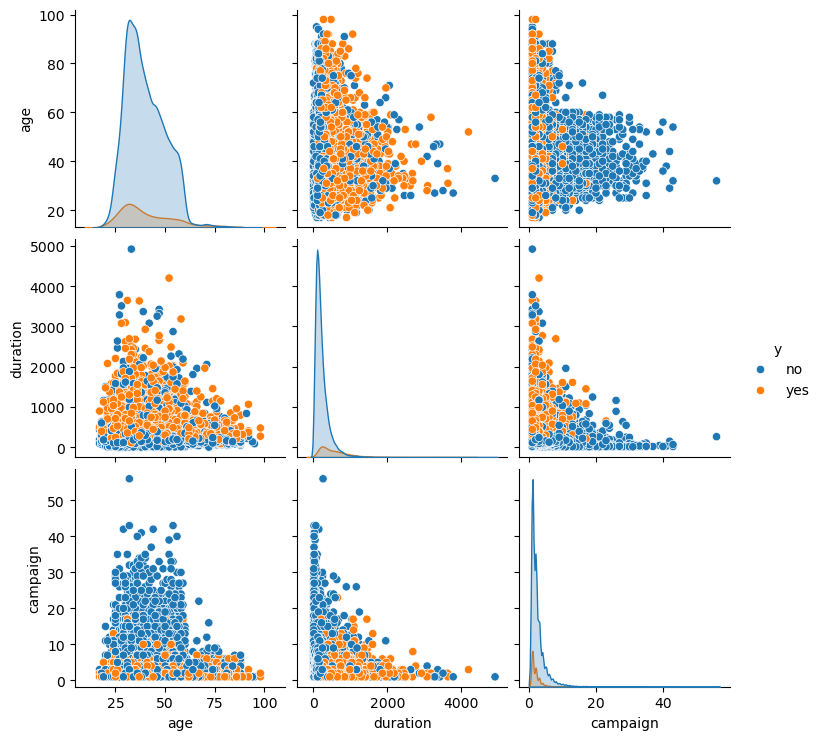

In [20]:

selected_features = ['age', 'duration', 'campaign', 'y']
sns.pairplot(df[selected_features], hue='y')
plt.savefig('../reports/figures/Task_1/pairplot_selected_features.png')
plt.show()
plt.close()

#### 2.6 Categorical Data Distribution

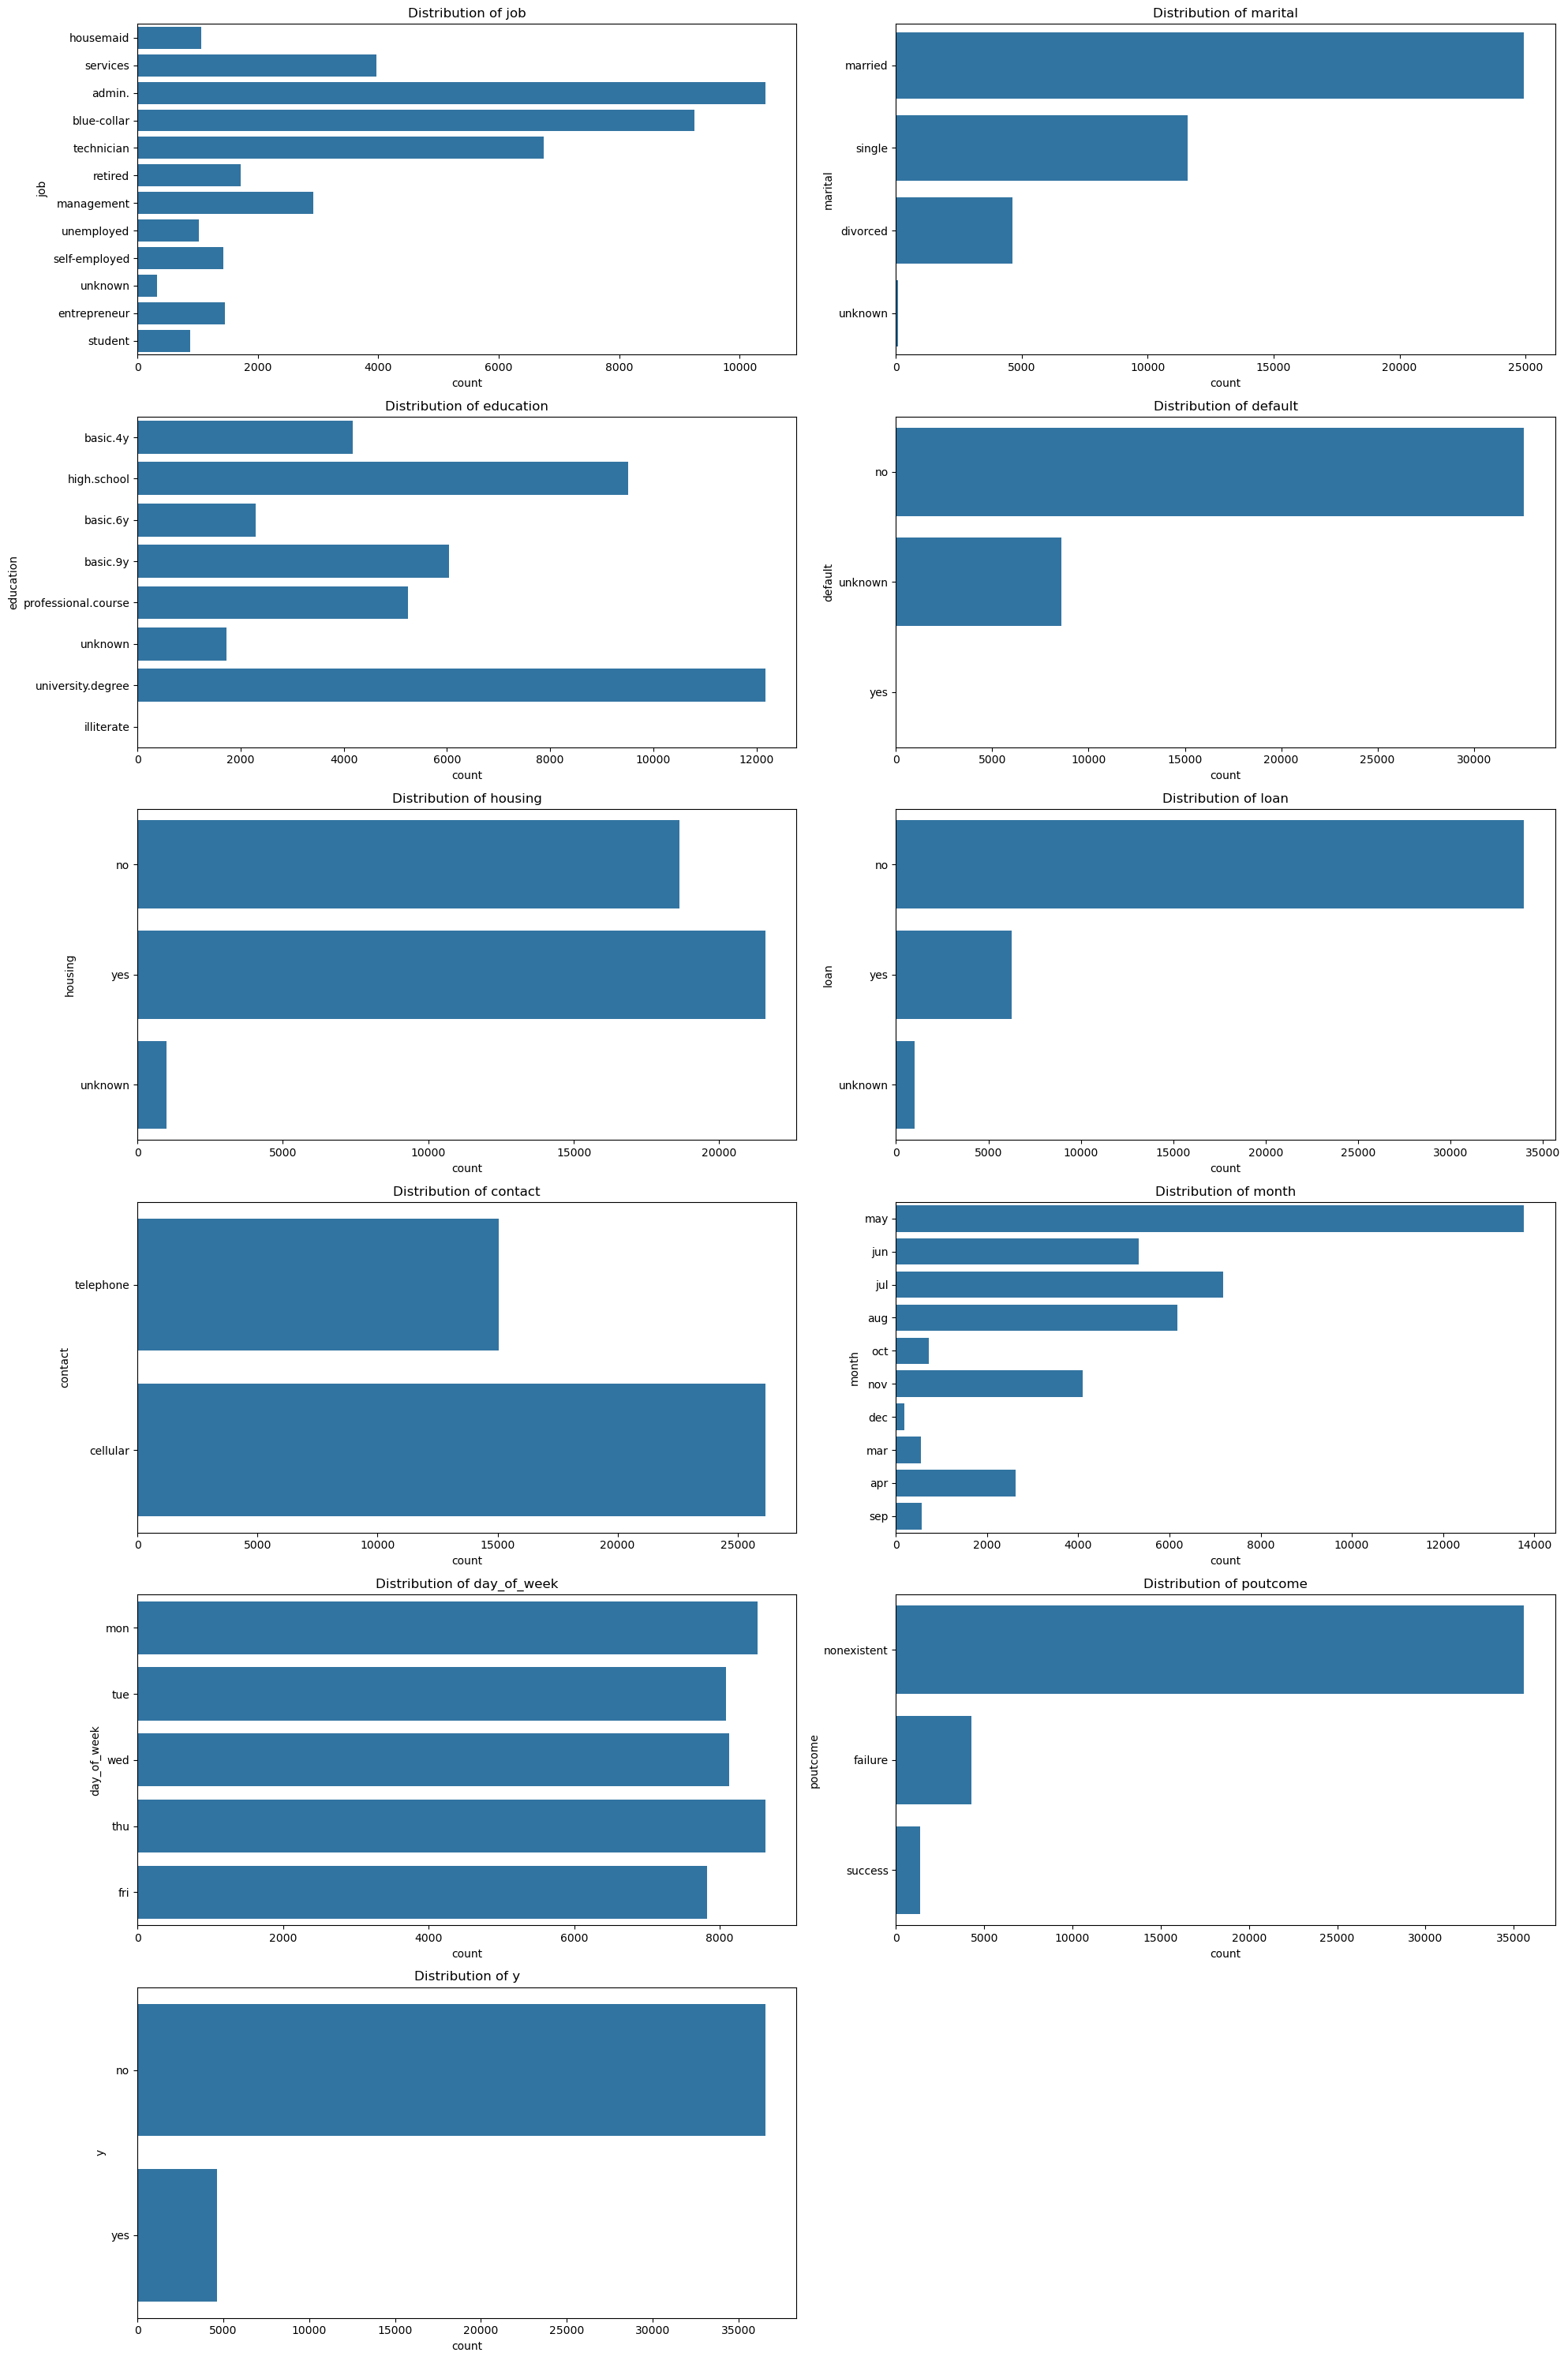

In [23]:
# Select categorical features
categorical_features = df.select_dtypes(include='object').columns

# Calculate the number of rows needed for subplots
num_features = len(categorical_features)
num_rows = (num_features + 1) // 2  

# Create subplots
fig, axes = plt.subplots(num_rows, 2, figsize=(20, num_rows * 5))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot count plots for each categorical feature
for i, feature in enumerate(categorical_features):
    sns.countplot(y=feature, data=df, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}')

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout and save the figure
plt.tight_layout()
plt.savefig('../reports/figures/Task_1/categorical_features_distribution.png')
plt.show()
plt.close()

#### 2.7 Numerical Distribution

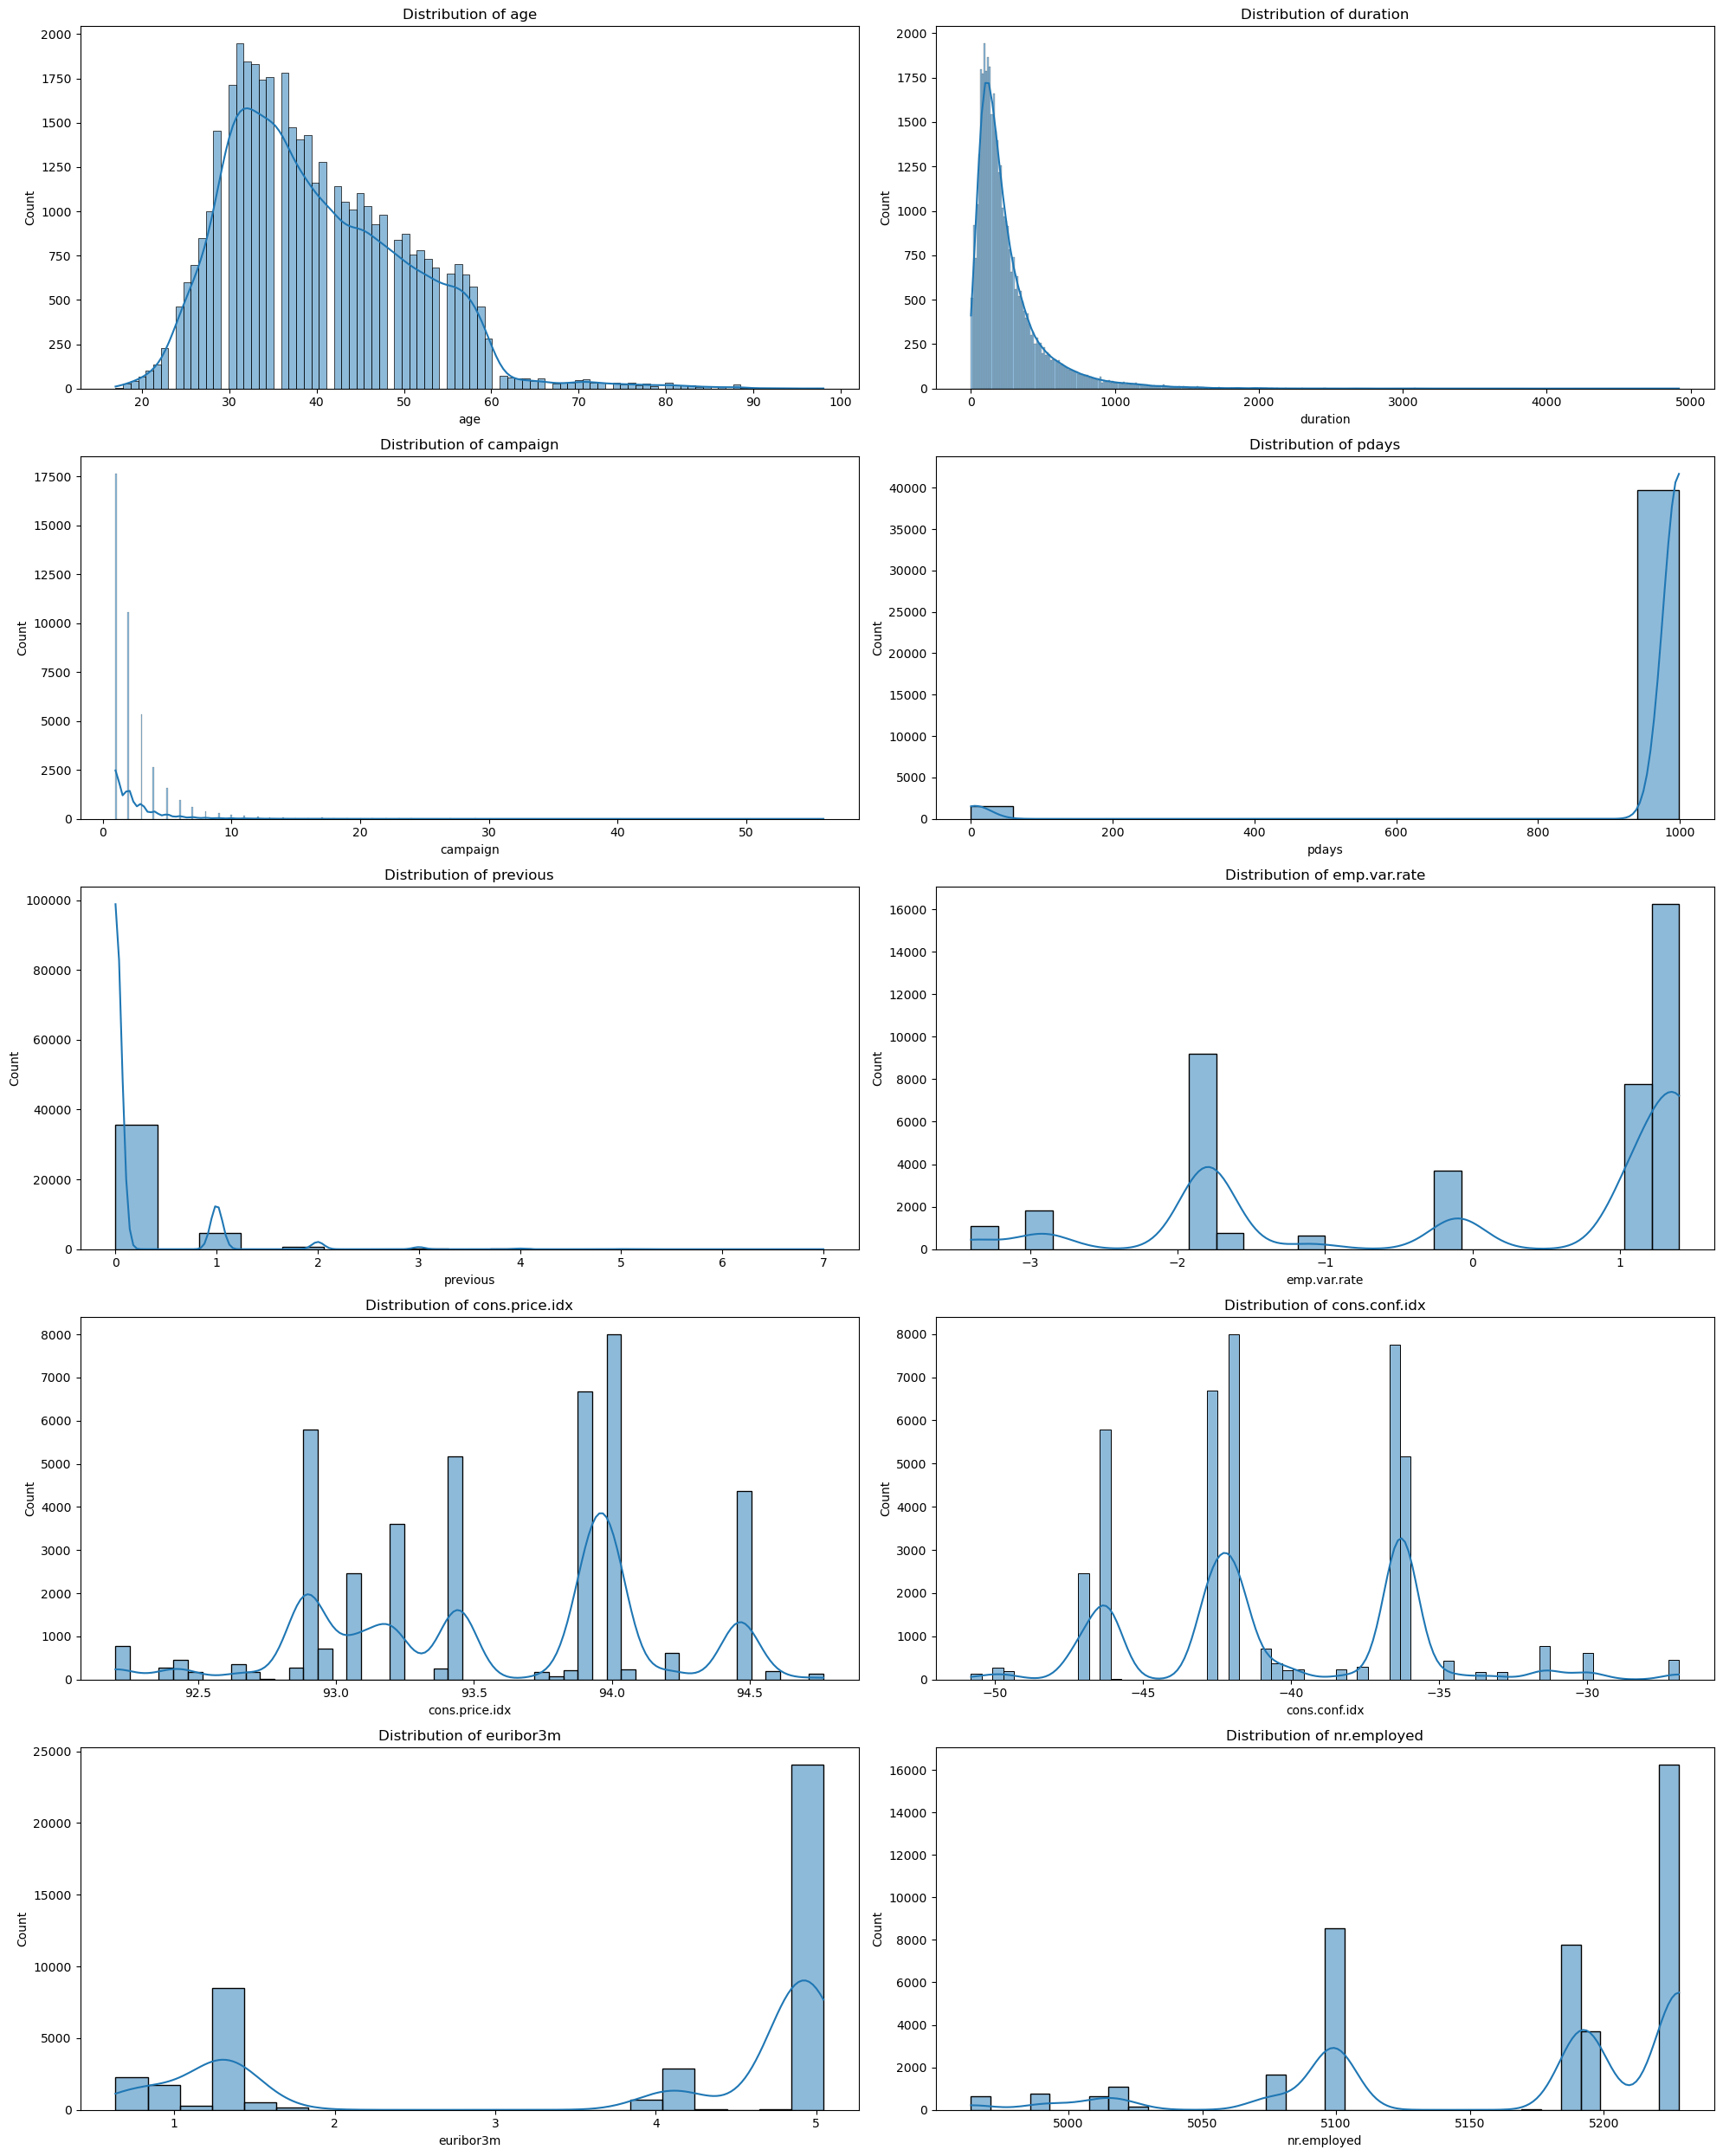

In [24]:
# Select the numerical features int64 and float64 from de info() method.
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns

# Select all the cululmns with the numerical data type.
num_features = len(numerical_features)
num_rows = (num_features + 1) // 2 

# Create subplots based on the rows nedeed.
fig, axes = plt.subplots(num_rows, 2, figsize=(20, num_rows * 5))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot the distribution of the numerical features. 
# This plots the Kenerl Density Estimation (KDE) of the numerical features.
for i, feature in enumerate(numerical_features):
    sns.histplot(df[feature], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}')

#Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
    

plt.tight_layout()
plt.savefig('../reports/figures/Task_1/numerical_features_distribution.png')
plt.show()
plt.close()

#### 2.8 Dataset Correlation Matrix

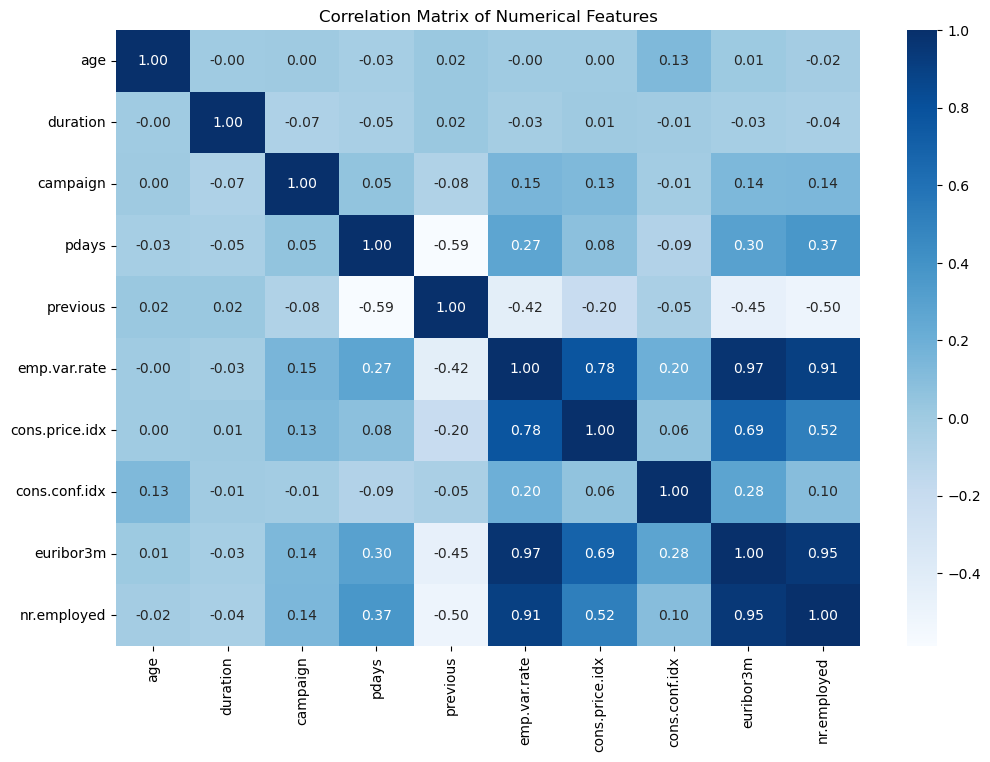

In [26]:
# Correlation matrix for numerical features
correlation_matrix = df[numerical_features].corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')

# Save and show the figure
plt.savefig('../reports/figures/Task_1/correlation_matrix.png')
plt.show()
plt.close()

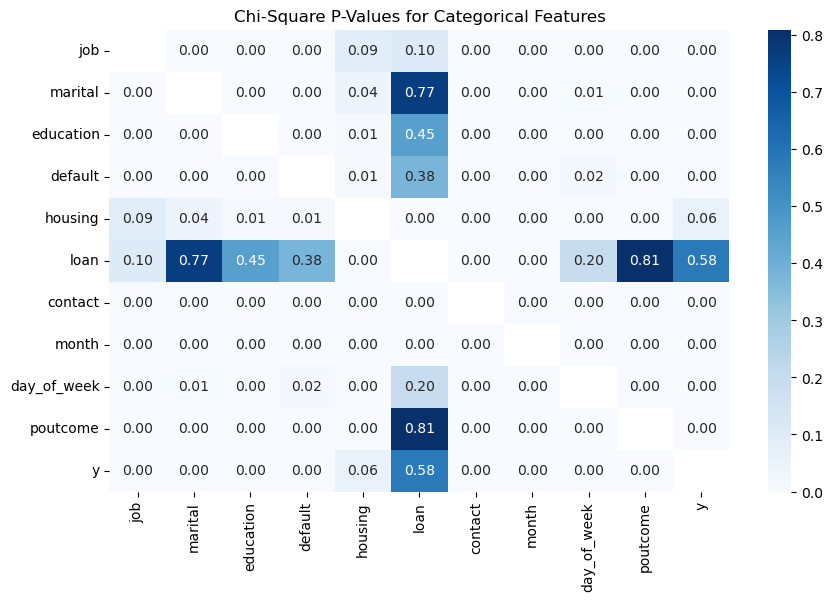

In [33]:
# Calculate the chi-square statistic and p-value for each pair of categorical features
def calculate_chi2_p_values(df, categorical_features):
    chi2_p_values = pd.DataFrame(index=categorical_features, columns=categorical_features)

    for feature1 in categorical_features:
        for feature2 in categorical_features:
            if feature1 == feature2:
                chi2_p_values.loc[feature1, feature2] = np.nan
                continue
            contingency_table = pd.crosstab(df[feature1], df[feature2])
            _, p, _, _ = chi2_contingency(contingency_table)
            chi2_p_values.loc[feature1, feature2] = p

    return chi2_p_values.astype(float)

# Select categorical features
categorical_features = df.select_dtypes(include=['object', 'category']).columns

# Calculate chi-square p-values
chi2_p_values = calculate_chi2_p_values(df, categorical_features)

# Plot the p-values
plt.figure(figsize=(10, 6))
sns.heatmap(chi2_p_values, annot=True, cmap='Blues', fmt='.2f')
plt.title('Chi-Square P-Values for Categorical Features')
plt.savefig('../reports/figures/chi_square_p_values.png')
plt.show()
plt.close()

### 3. Data Preparation

### The classification can be optimize for the bussiness by 2 approachs 
- Financial Situations 
- Timing of the calls from marketing

In [34]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [35]:
# Financial Situation 
# Select the financial features and the target variable
financial_features = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
target = 'y'

In [36]:
# Prepare the data
X = df[financial_features]
y = df[target]

In [37]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=96)

In [38]:
numeric_features = ['age', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan']

In [41]:
# Define the preprocessor 
# The preprocessor is a ColumnTransformer that applies the following transformations to the features:
# - For numerical features: Impute missing values with the median and scale the features
# - For categorical features: Impute missing values with a constant value and one-hot encode the features
# The preprocessor is used in the pipeline along with the RandomForestClassifier.
# The pipeline is used to chain the preprocessor and the classifier together.
# The pipeline is then used to fit the model on the training data and make predictions on the testing data.


numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

### 4. Modeling

In [44]:
rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

rf_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'cons.price.idx',
                                                   'cons.conf.idx', 'euribor3m',
                                                   'nr.employed']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['job', 'marital',
                                                   'education', 'default',
                                                   'housing', 'loan'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

### 5. Evaluation

Classification Report:
              precision    recall  f1-score   support

          no       0.91      0.95      0.93      7314
         yes       0.38      0.23      0.29       924

    accuracy                           0.87      8238
   macro avg       0.64      0.59      0.61      8238
weighted avg       0.85      0.87      0.86      8238



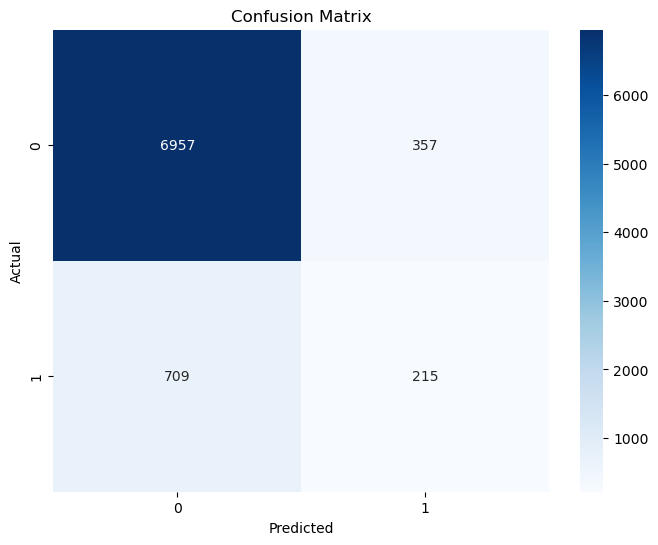

AttributeError: 'OneHotEncoder' object has no attribute 'get_feature_names'

In [45]:
# Make predictions
y_pred = rf_pipeline.predict(X_test)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Feature importance
feature_names = (numeric_features + 
                 rf_pipeline.named_steps['preprocessor']
                 .named_transformers_['cat']
                 .named_steps['onehot']
                 .get_feature_names(categorical_features).tolist())

importances = rf_pipeline.named_steps['classifier'].feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 8))
plt.title("Feature Importances")
plt.bar(range(len(importances)), importances[indices])
plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()

# Print top 10 features
print("\nTop 10 most important features:")
for f, idx in enumerate(indices[:10]):
    print("{0}) {1}: {2:.4f}".format(f + 1, feature_names[idx], importances[idx]))